### 피마 인디언 당뇨병 예측

### https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

- 당뇨병 여부를 판단.
- 피마 인디언 당뇨병 데이터 셋트는 북아메리카 피마 지역 원주민의  Type-2 당뇨병 결과 데이터. 

- 보통 당뇨 원인으로 식습관과 유전을 꼽습니다.

- 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 20세기 후반에 들어서면서 서구화된 식습관으로 당뇨 환자가 생김.

 - Pregnancies : 임신 횟수 -> Number of times pregnant
 - Glucose : 포도당 부하 검사 수치 -> Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 - bloodPressure:혈압(mm Hg) -> Diastolic blood pressure (mm Hg)
 - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm) ->Triceps skin fold thickness (mm)
 - Insulin : 2시간 혈청 인슐린(mu U/ml) ->2-Hour serum insulin (mu U/ml)
 - BMI : 체질량 지수( 체중(kg) / (키(m)^2)) -> Body mass index (weight in kg/(height in m)^2)
 - DiabetesPedigressFunction : 당뇨병 혈통 기능. ->Diabetes pedigree function
 - Age : 나이 ->age(years)
 - Outcome : class 결정 값 (0 또는 1) -> Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
import calendar
import numpy as np
import pandas as pd
#from pandas.core.frame import DataFrame
#from pandas.core.series import Series #이렇게 불러도 됨.
import seaborn as sns # 통계적 plot
from scipy import stats #통계
import missingno as msno #결측치 보는 plot
from datetime import datetime #day
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings #에러는 아닌데 주희하는게 뜨는것을 방지.
warnings.filterwarnings('ignore')
df_data = pd.read_csv("https://raw.githubusercontent.com/the9world/My_Study/main/Z_running_file/Pima%20Indians%20Diabetes%20Database/diabetes.csv")

In [2]:
df_data.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df_data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Outcome'>

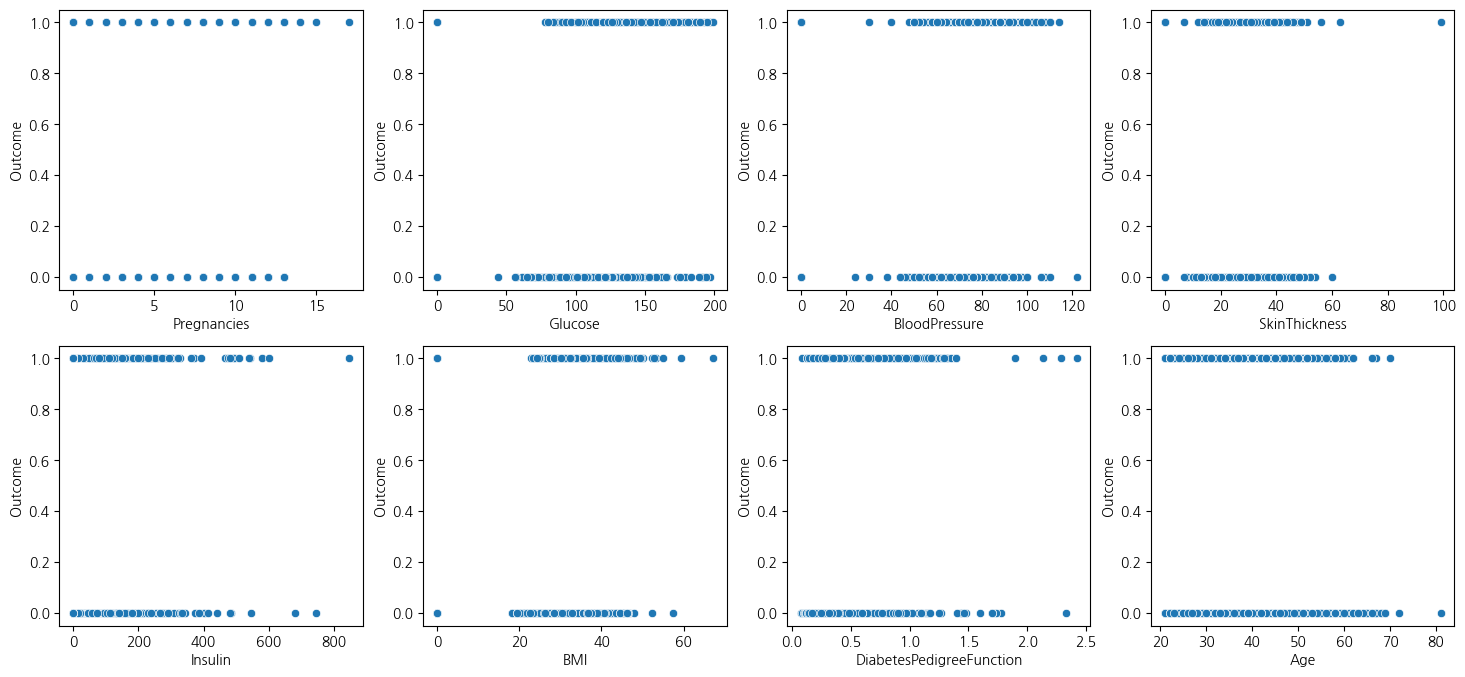

In [7]:
fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8))=plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(18,8)
sns.scatterplot(data = df_data, x='Pregnancies', y='Outcome',ax=ax1)
sns.scatterplot(data = df_data, x='Glucose', y='Outcome',ax=ax2)
sns.scatterplot(data = df_data, x='BloodPressure', y='Outcome',ax=ax3)
sns.scatterplot(data = df_data, x='SkinThickness', y='Outcome',ax=ax4)
sns.scatterplot(data = df_data, x='Insulin', y='Outcome',ax=ax5)
sns.scatterplot(data = df_data, x='BMI', y='Outcome',ax=ax6)
sns.scatterplot(data = df_data, x='DiabetesPedigreeFunction', y='Outcome',ax=ax7)
sns.scatterplot(data = df_data, x='Age', y='Outcome',ax=ax8)

In [8]:
# fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8))=plt.subplots(nrows=2,ncols=4)
# fig.set_size_inches(18,8)
# sns.countplot(data = df_data, x='Pregnancies', hue='Outcome', ax=ax1)
# sns.countplot(data = df_data, x='Glucose', hue='Outcome',ax=ax2)
# sns.countplot(data = df_data, x='BloodPressure', hue='Outcome',ax=ax3)
# sns.countplot(data = df_data, x='SkinThickness', hue='Outcome',ax=ax4)
# sns.countplot(data = df_data, x='Insulin', hue='Outcome',ax=ax5)
# sns.countplot(data = df_data, x='BMI', hue='Outcome',ax=ax6)
# sns.countplot(data = df_data, x='DiabetesPedigreeFunction', hue='Outcome',ax=ax7)
# sns.countplot(data = df_data, x='Age', hue='Outcome',ax=ax8)

<Axes: xlabel='Pregnancies', ylabel='count'>

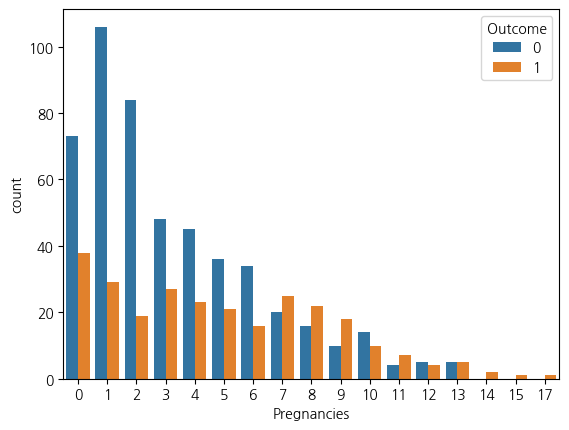

In [9]:
sns.countplot(x='Pregnancies', hue='Outcome', data= df_data)

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

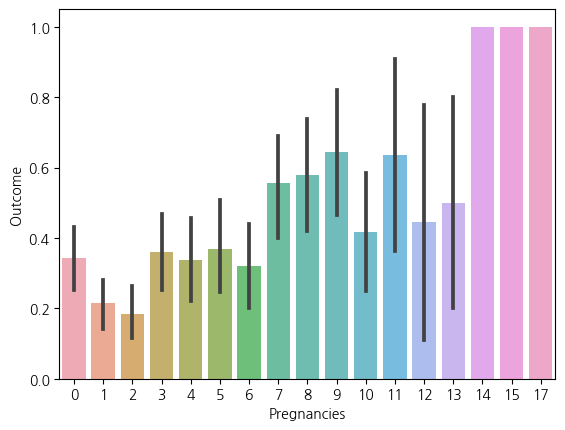

In [10]:
sns.barplot(x=df_data['Pregnancies'], y= df_data['Outcome'], alpha=0.8)

In [11]:
bins= [20, 30, 40, 50, 60, 70]
age_bins = pd.cut(df_data['Age'], bins)


In [12]:
age_bins

0      (40, 50]
1      (30, 40]
2      (30, 40]
3      (20, 30]
4      (30, 40]
         ...   
763    (60, 70]
764    (20, 30]
765    (20, 30]
766    (40, 50]
767    (20, 30]
Name: Age, Length: 768, dtype: category
Categories (5, interval[int64, right]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [13]:
group_names= ["20~30대", "30~40대", "40~50대", "50대~60대 ","60대~70대"]
age_category= pd.cut(df_data["Age"], bins, labels=group_names)


In [14]:
age_category.head()

0    40~50대
1    30~40대
2    30~40대
3    20~30대
4    30~40대
Name: Age, dtype: category
Categories (5, object): ['20~30대' < '30~40대' < '40~50대' < '50대~60대 ' < '60대~70대']

<Axes: xlabel='Age', ylabel='Outcome'>

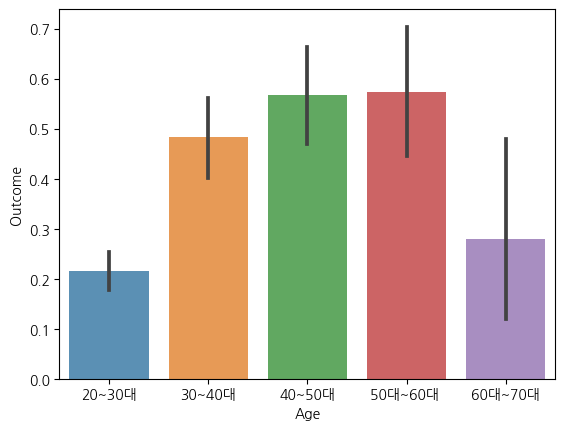

In [15]:
sns.barplot(x=age_category, y=df_data["Outcome"], alpha=0.8)

<Axes: xlabel='Age', ylabel='Outcome'>

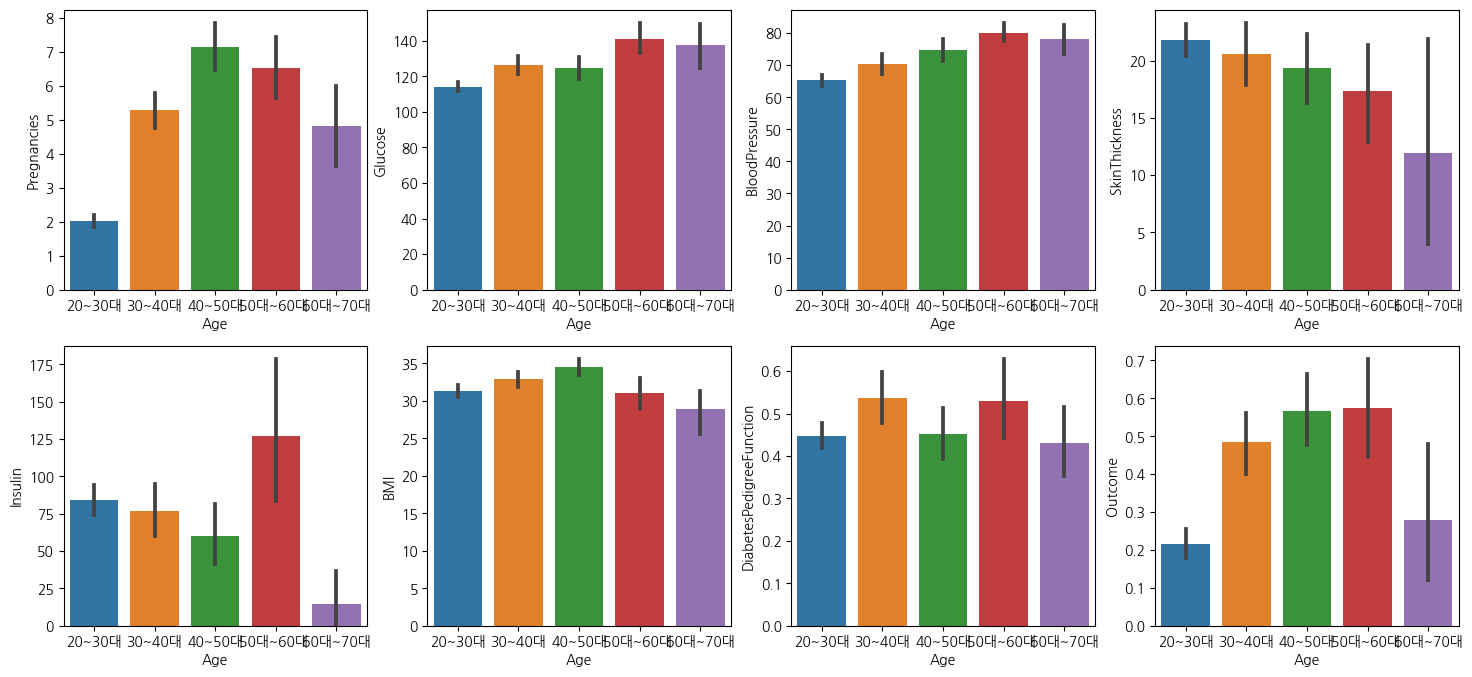

In [16]:
fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8))=plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(18,8)
sns.barplot(y=df_data['Pregnancies'], x= age_category, ax=ax1)
sns.barplot(y=df_data['Glucose'], x= age_category, ax=ax2)
sns.barplot(y=df_data['BloodPressure'], x= age_category, ax=ax3)
sns.barplot(y=df_data['SkinThickness'], x= age_category, ax=ax4)
sns.barplot(y=df_data['Insulin'], x= age_category, ax=ax5)
sns.barplot(y=df_data['BMI'], x= age_category, ax=ax6)
sns.barplot(y=df_data['DiabetesPedigreeFunction'], x= age_category, ax=ax7)
sns.barplot( y=df_data['Outcome'], x= age_category, ax=ax8)


<Axes: xlabel='BMI', ylabel='Count'>

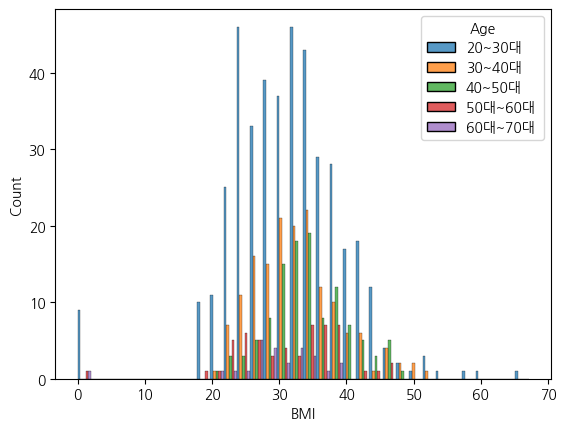

In [17]:
sns.histplot(x=df_data["BMI"], multiple='dodge', hue=age_category)

In [18]:
# sns.pointplot(x="BMI", y="Insulin", data=df_data)

<Axes: >

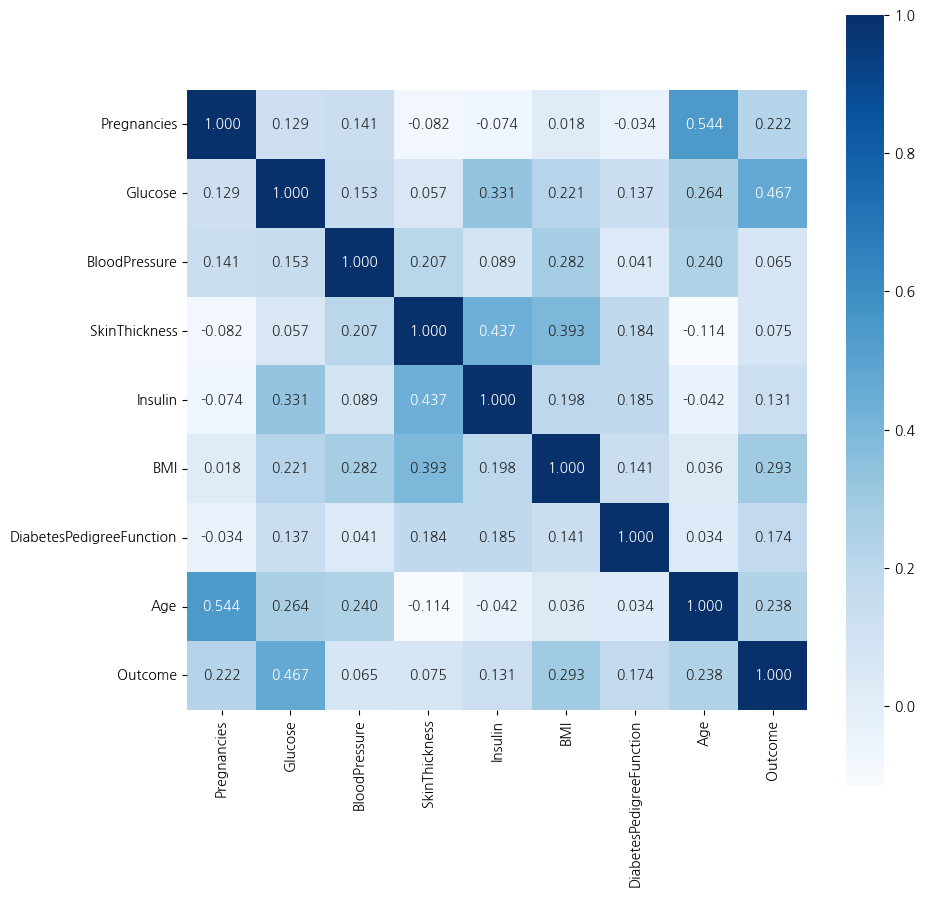

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df_data.corr(), fmt='.3f', annot=True, cmap='Blues',square=True)

<Axes: xlabel='Outcome', ylabel='Density'>

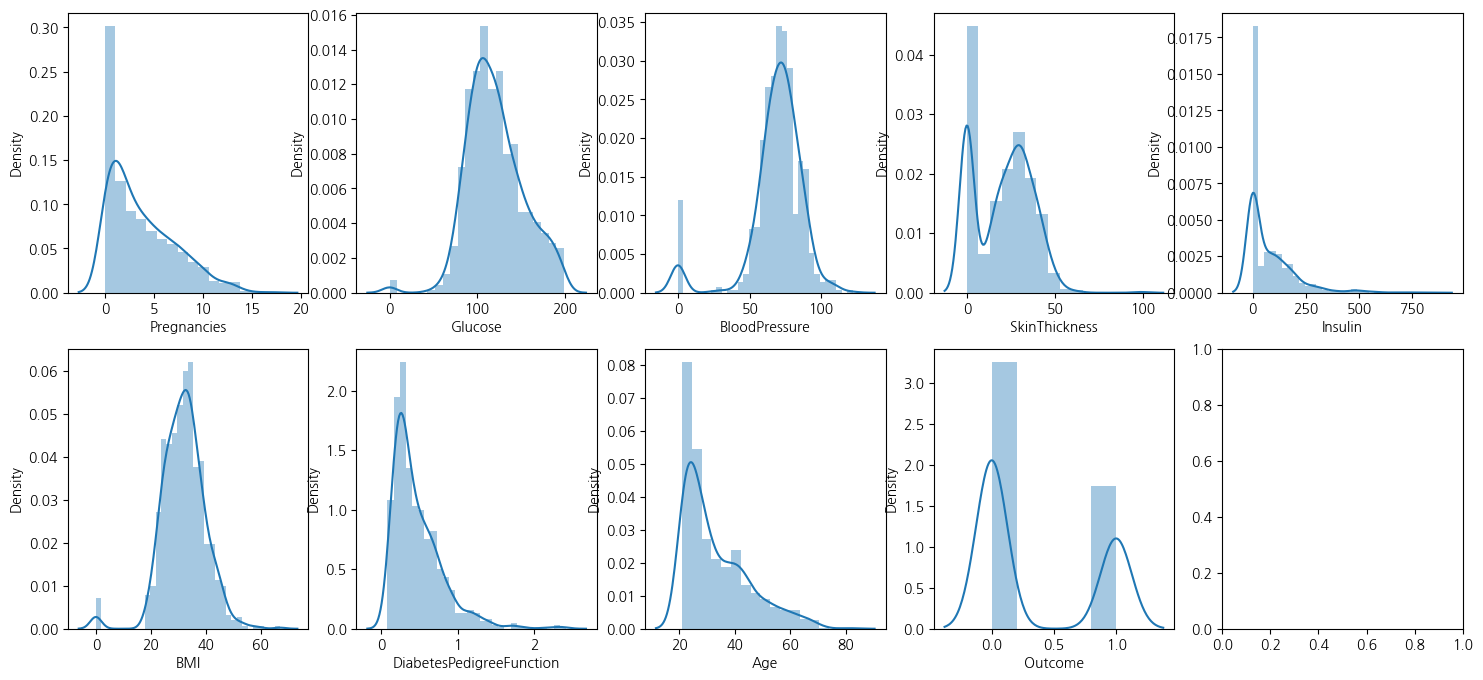

In [20]:
fig, ((ax1, ax2, ax3, ax4, ax5),(ax6, ax7, ax8, ax9, ax10))=plt.subplots(nrows=2,ncols=5)
fig.set_size_inches(18,8)
sns.distplot(df_data['Pregnancies'], ax=ax1)
sns.distplot(df_data['Glucose'], ax=ax2)
sns.distplot(df_data['BloodPressure'], ax=ax3)
sns.distplot(df_data['SkinThickness'], ax=ax4)
sns.distplot(df_data['Insulin'], ax=ax5)
sns.distplot(df_data['BMI'], ax=ax6)
sns.distplot(df_data['DiabetesPedigreeFunction'], ax=ax7)
sns.distplot(df_data['Age'], ax=ax8)
sns.distplot(df_data['Outcome'], ax=ax9)

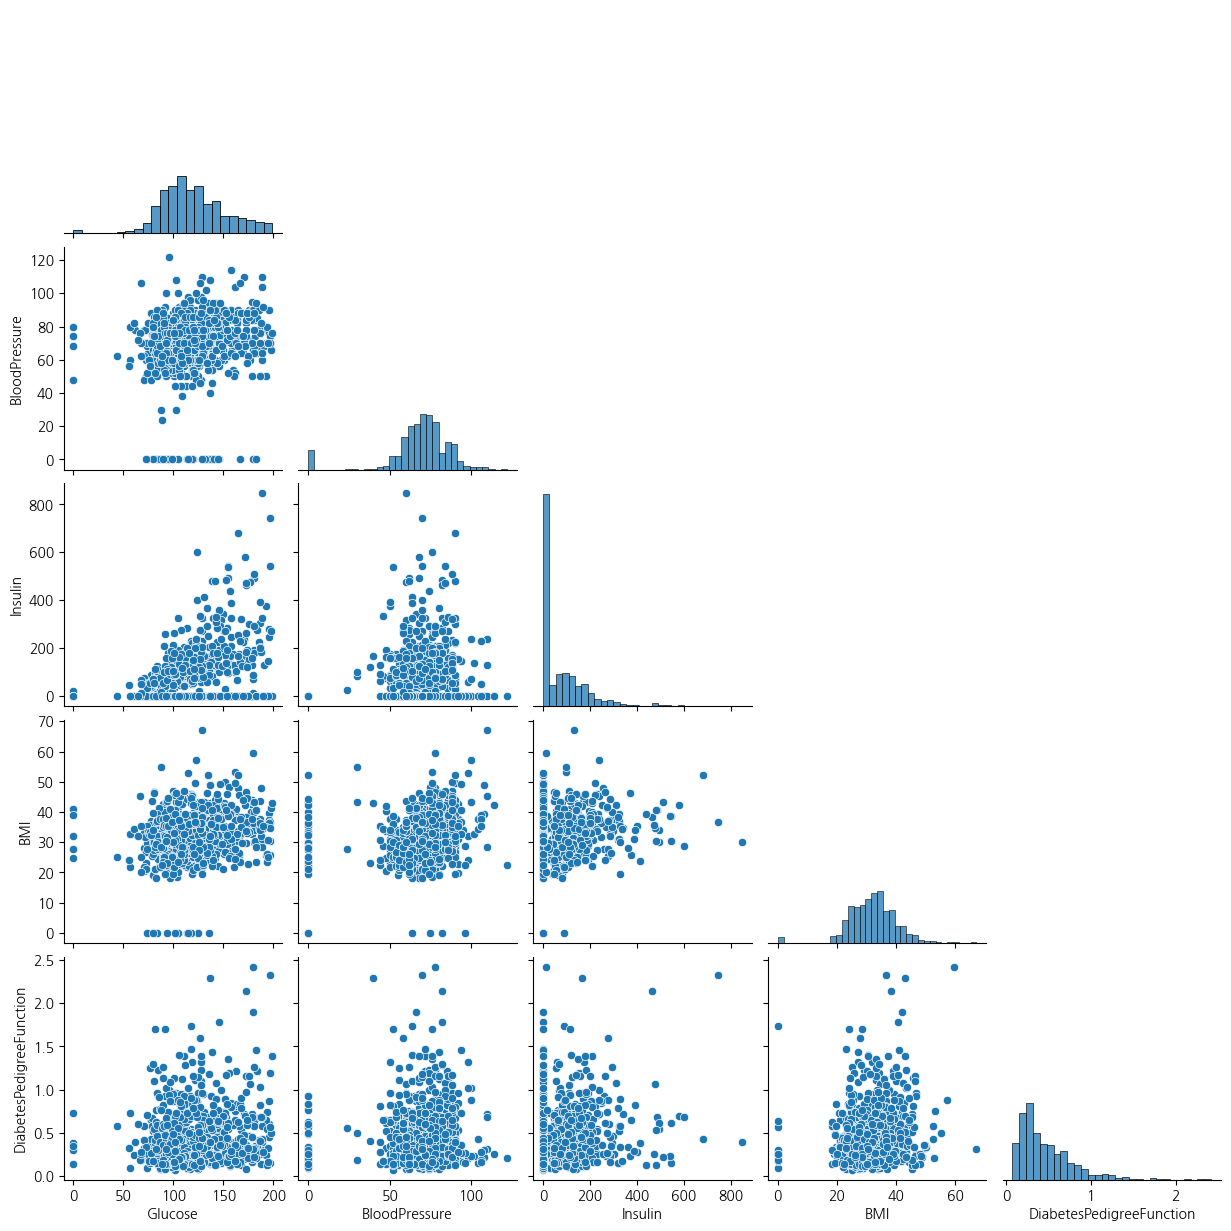

In [21]:
fig= sns.pairplot(df_data[["Glucose", "BloodPressure", "Insulin",
                           "BMI", "DiabetesPedigreeFunction"]], corner=True)


In [22]:
# fig= sns.pairplot(df_data, hue="Outcome", corner=True)

<Axes: xlabel='BMI', ylabel='Density'>

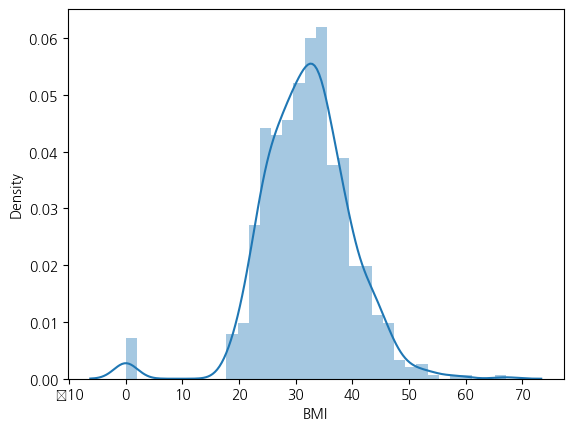

In [23]:
sns.distplot(df_data['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='BMI'>

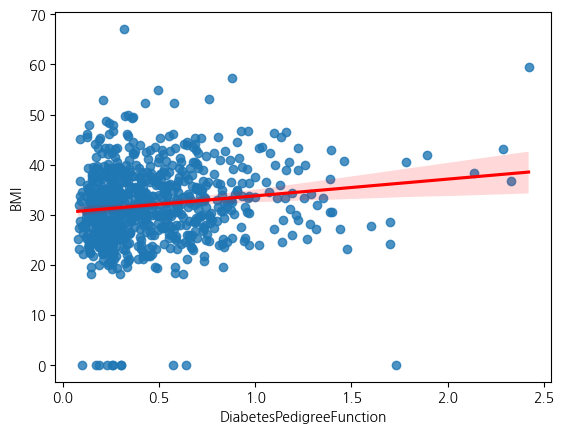

In [24]:
sns.regplot(x='DiabetesPedigreeFunction', y='BMI', data=df_data, line_kws={"color": "red"})

<Axes: xlabel='BloodPressure', ylabel='BMI'>

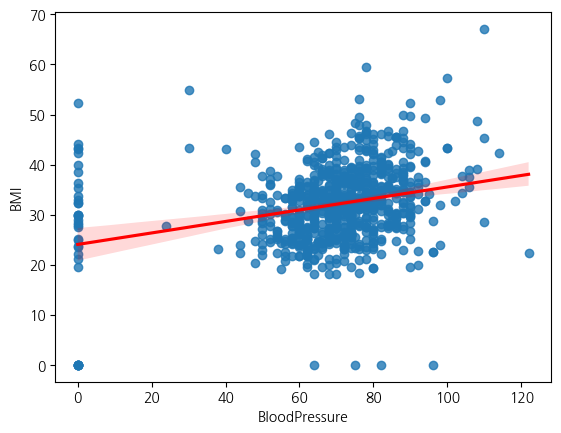

In [25]:
sns.regplot(x='BloodPressure', y='BMI', data=df_data, line_kws={"color": "red"})

<Axes: xlabel='Glucose', ylabel='BMI'>

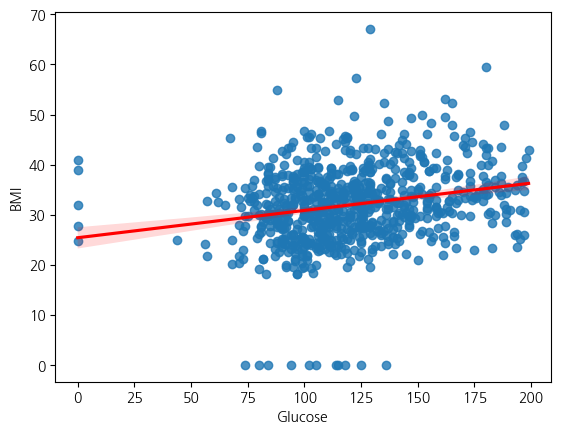

In [26]:
sns.regplot(x='Glucose', y='BMI', data=df_data, line_kws={"color": "red"})

<Axes: xlabel='SkinThickness', ylabel='BMI'>

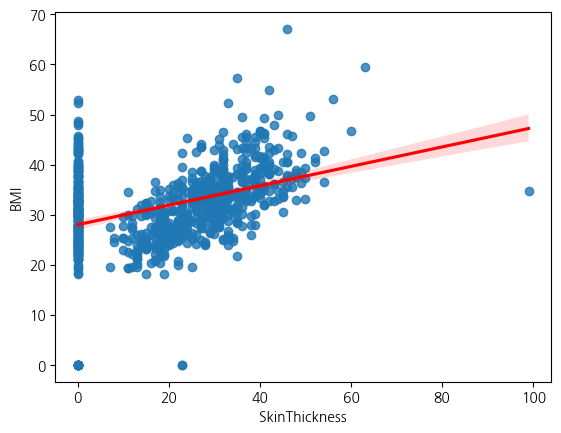

In [27]:
sns.regplot(x='SkinThickness', y='BMI', data=df_data, line_kws={"color": "red"})

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

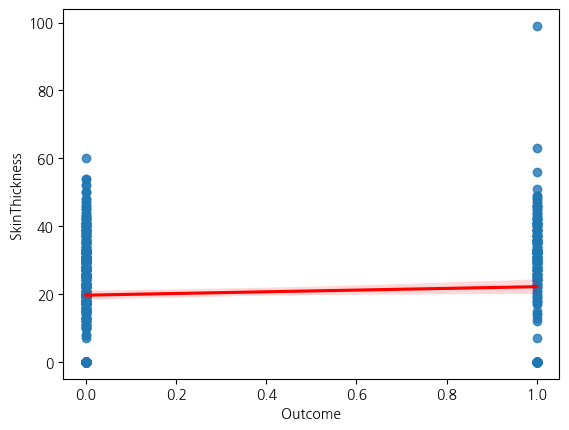

In [28]:
sns.regplot(y='SkinThickness', x='Outcome', data=df_data, line_kws={"color": "red"})

<Axes: xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

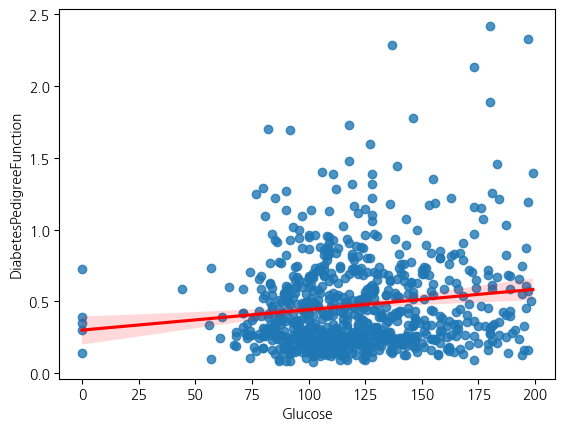

In [29]:
sns.regplot(x='Glucose', y='DiabetesPedigreeFunction', data=df_data, line_kws={"color": "red"})

<Axes: xlabel='Glucose', ylabel='BMI'>

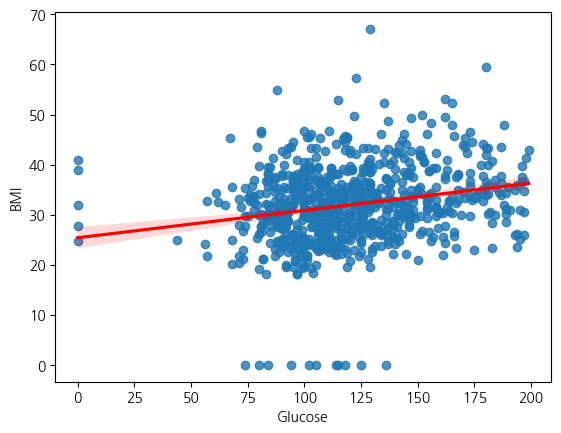

In [30]:
sns.regplot(x='Glucose', y='BMI', data=df_data, line_kws={"color": "red"})

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

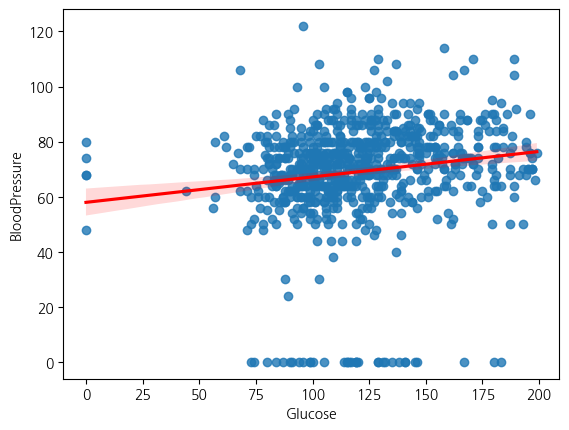

In [31]:
sns.regplot(x='Glucose', y='BloodPressure', data=df_data, line_kws={"color": "red"})

<Axes: xlabel='Outcome', ylabel='Glucose'>

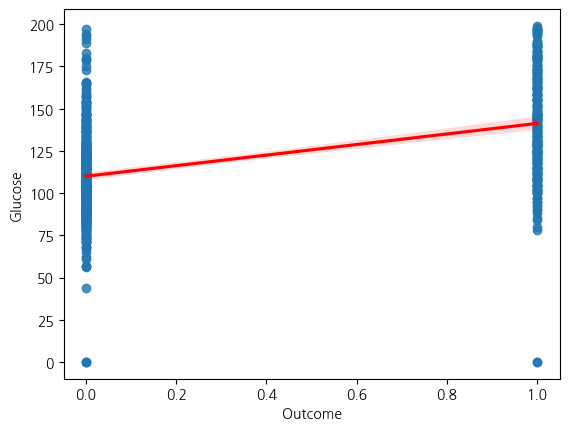

In [32]:
sns.regplot(y='Glucose', x='Outcome', data=df_data, line_kws={"color": "red"})

In [33]:
# pg = sns.PairGrid(df_data)
# pg.map_upper(sns.regplot)

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

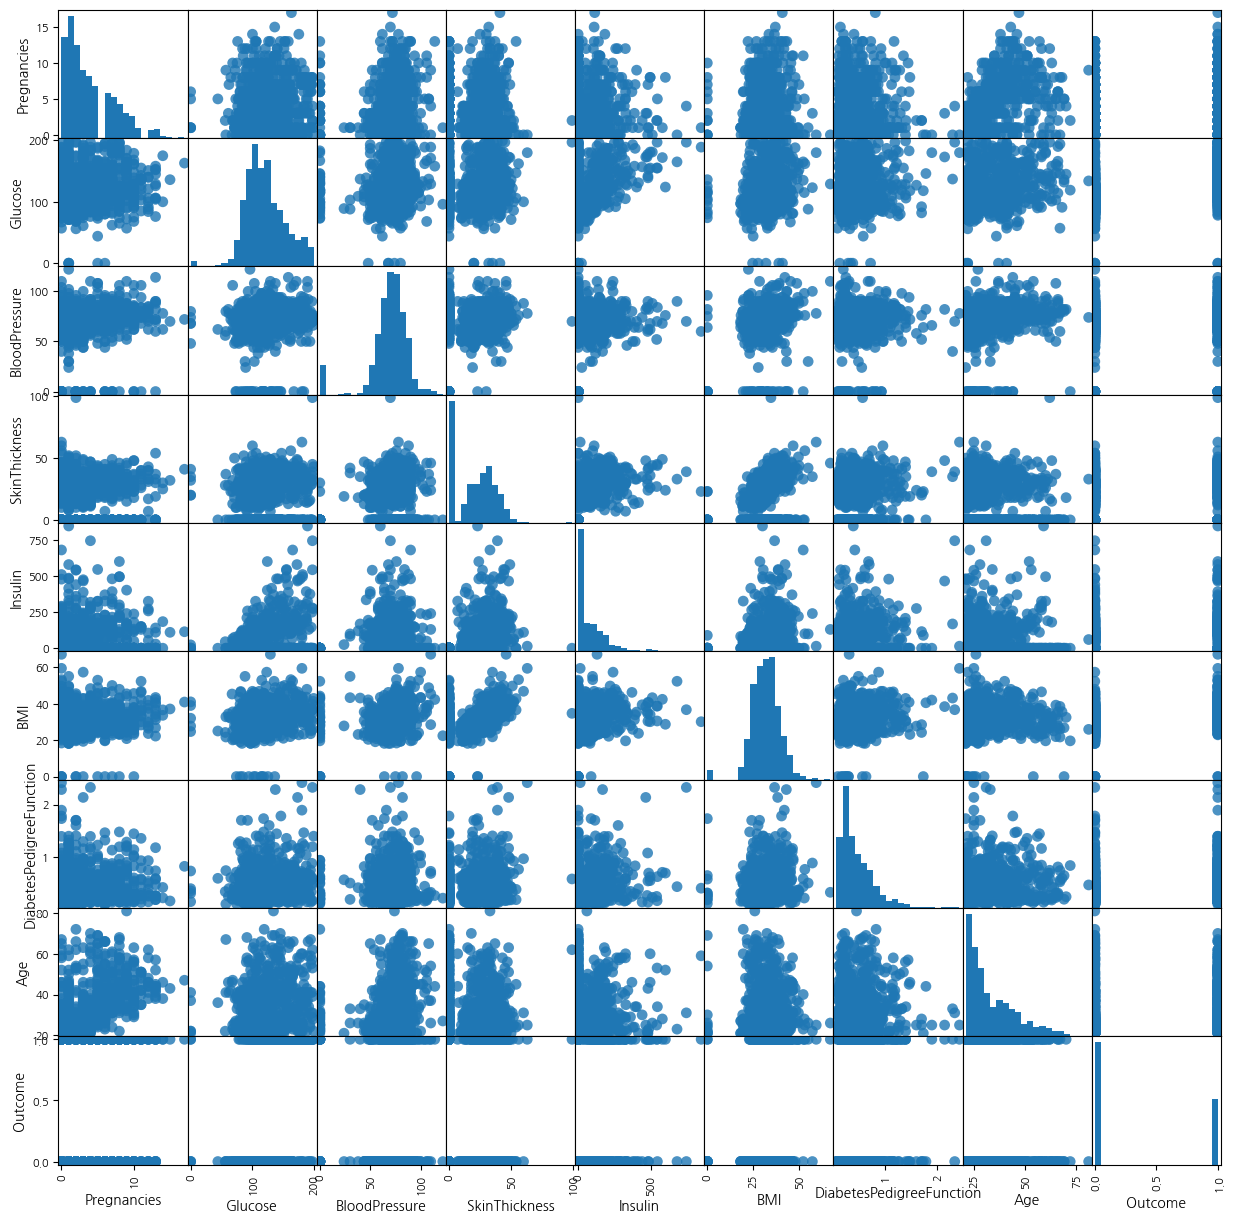

In [34]:
pd.plotting.scatter_matrix(df_data,figsize=(15,15),
                          marker='o', hist_kwds={'bins':20},
                          s=60,alpha=0.8)

In [35]:
df_data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
df_data = df_data[df_data["BMI"] != 0]

In [37]:
df_data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
10,4,110,92,0,0,37.6,0.191,30,0


In [38]:
df_data[df_data["Glucose"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [55]:
df_data[df_data == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_data["SkinThickness"]= df_data["SkinThickness"].replace(0, np.NaN)
df_data["Insulin"]= df_data["Insulin"].replace(0, np.NaN)
df_data["BloodPressure"]= df_data["BloodPressure"].replace(0, np.NaN)

In [40]:
df_data.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                28
SkinThickness               218
Insulin                     364
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [41]:
df_data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
10,4,110,92.0,NaN,NaN,37.6,0.191,30,0


In [42]:
# df_data['Insulin'].fillna(df_data["Insulin"].median(skipna=True), inplace=True)
# df_data['BloodPressure'].fillna(df_data["BloodPressure"].median(skipna=True), inplace=True)
# df_data

In [43]:
df_data['Insulin'].fillna(df_data["Insulin"].mean(skipna=True), inplace=True)
df_data['BloodPressure'].fillna(df_data["BloodPressure"].mean(skipna=True), inplace=True)

In [44]:
df_data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.0,155.717557,33.6,0.627,50,1
1,1,85,66.000000,29.0,155.717557,26.6,0.351,31,0
2,8,183,64.000000,NaN,155.717557,23.3,0.672,32,1
3,1,89,66.000000,23.0,94.000000,28.1,0.167,21,0
4,0,137,40.000000,35.0,168.000000,43.1,2.288,33,1
5,5,116,74.000000,NaN,155.717557,25.6,0.201,30,0
6,3,78,50.000000,32.0,88.000000,31.0,0.248,26,1
7,10,115,72.367627,NaN,155.717557,35.3,0.134,29,0
8,2,197,70.000000,45.0,543.000000,30.5,0.158,53,1
10,4,110,92.000000,NaN,155.717557,37.6,0.191,30,0


In [45]:
df_data["BloodPressure"].mean()

72.3676268861454

<Axes: >

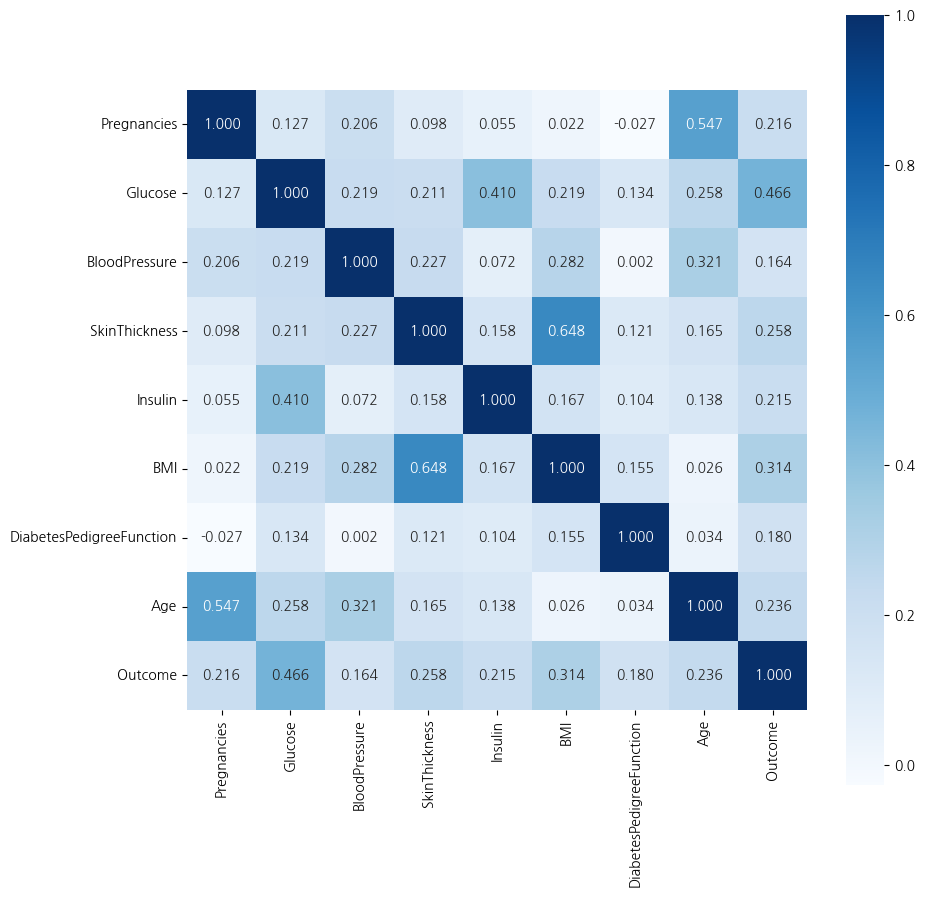

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df_data.corr(), fmt='.3f', annot=True, cmap='Blues',square=True)

<Axes: >

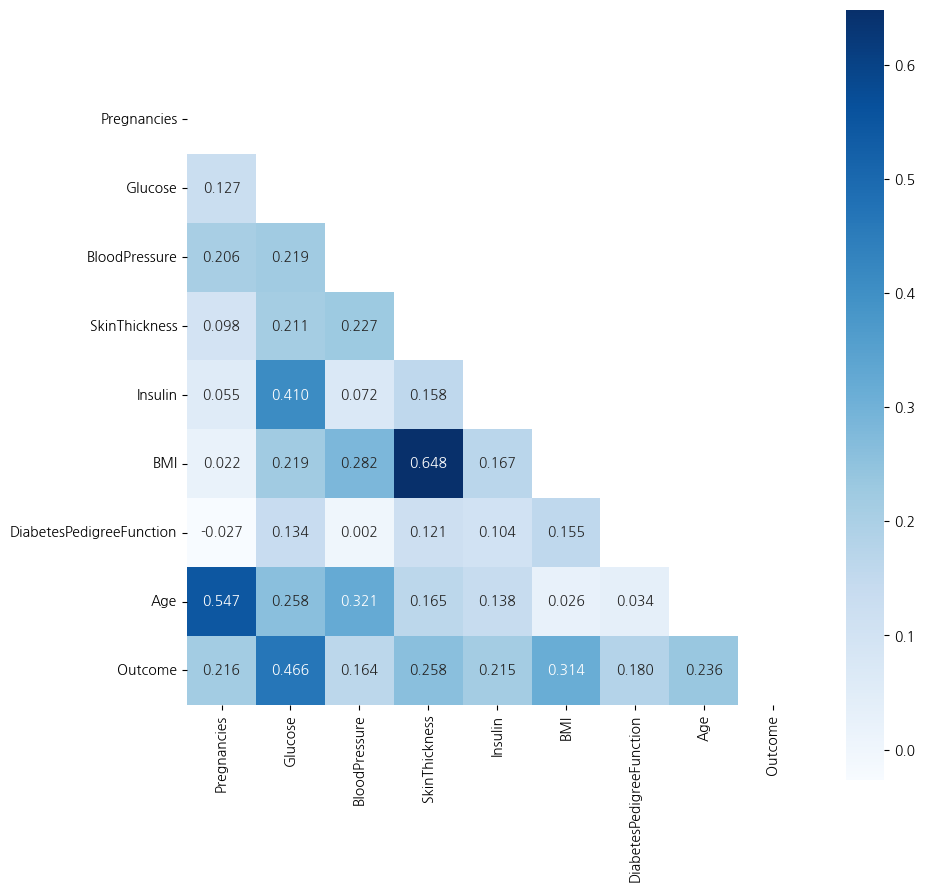

In [59]:
harp= np.triu(df_data.corr()) # 절반 변수 생성
plt.figure(figsize=(10,10)) # 시각화 사이즈
sns.heatmap(df_data.corr(), fmt='.3f', annot=True, cmap='Blues',square=True, mask=harp)
# mask 선택 출력 

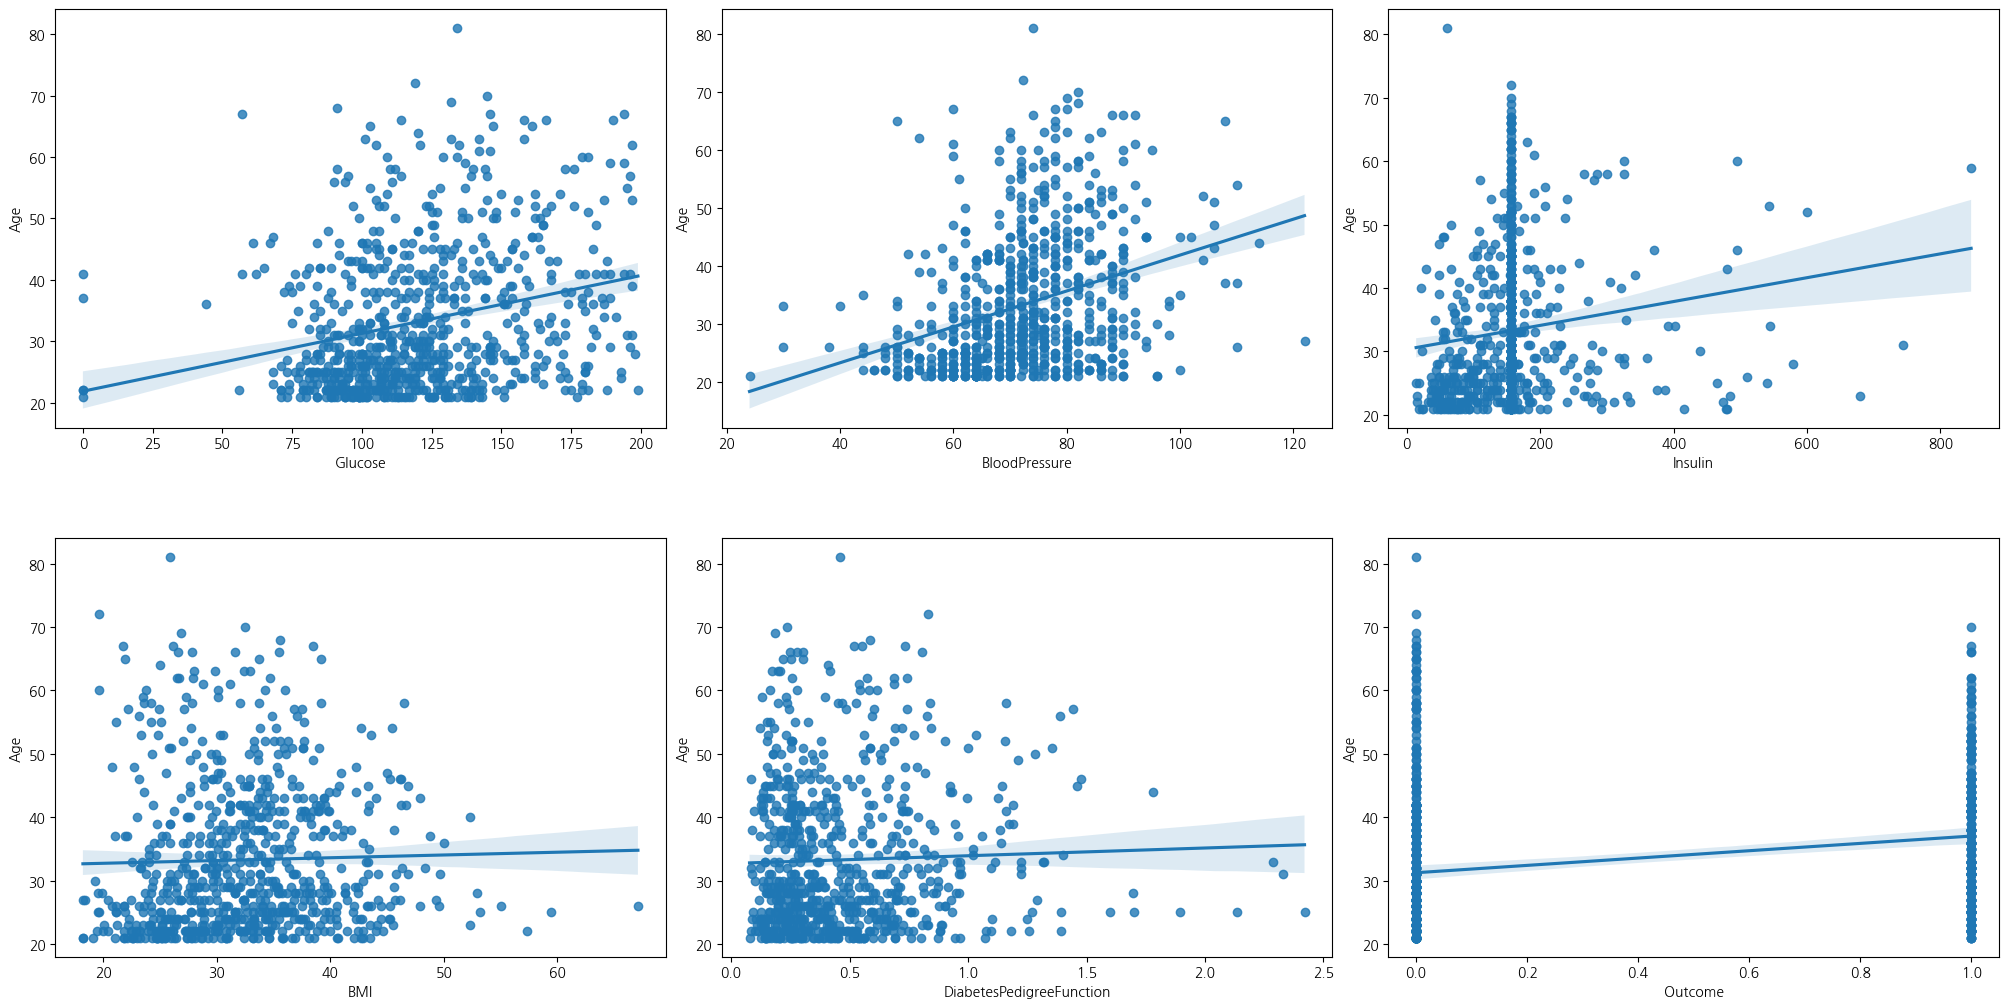

In [65]:
columns_sels = ["Glucose", "BloodPressure", "Insulin", "BMI", 'DiabetesPedigreeFunction', "Outcome"]
x=df_data.loc[:,columns_sels]
y=df_data['Age']

fig,axes = plt.subplots(ncols=3,nrows=2,figsize=(20,10))
index=0
axes = axes.flatten()
for i,k in enumerate(columns_sels):
    sns.regplot(y=y, x=x[k], ax = axes[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [47]:
# 훈련데이터 세트 분할
import pandas as pd
from sklearn.model_selection import train_test_split
X_data=df_data.drop("Outcome", axis=1) # 한번 실행하면 그 다음부턴 Error
y_data= df_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=12)

In [48]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(605, 8) (605,)
(152, 8) (152,)


In [49]:
df_data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
df_data[df_data["BMI"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [51]:
# X_train.drop(labels="BMI", axis=0, level=None, inplace=False, errors='raise')
X_train = X_train[X_train["BMI"] != 0]

In [52]:
X_train[X_train["BloodPressure"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age


In [53]:
df_data[df_data["BloodPressure"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


ValueError: 'c' argument has 605 elements, which is inconsistent with 'x' and 'y' with size 438.

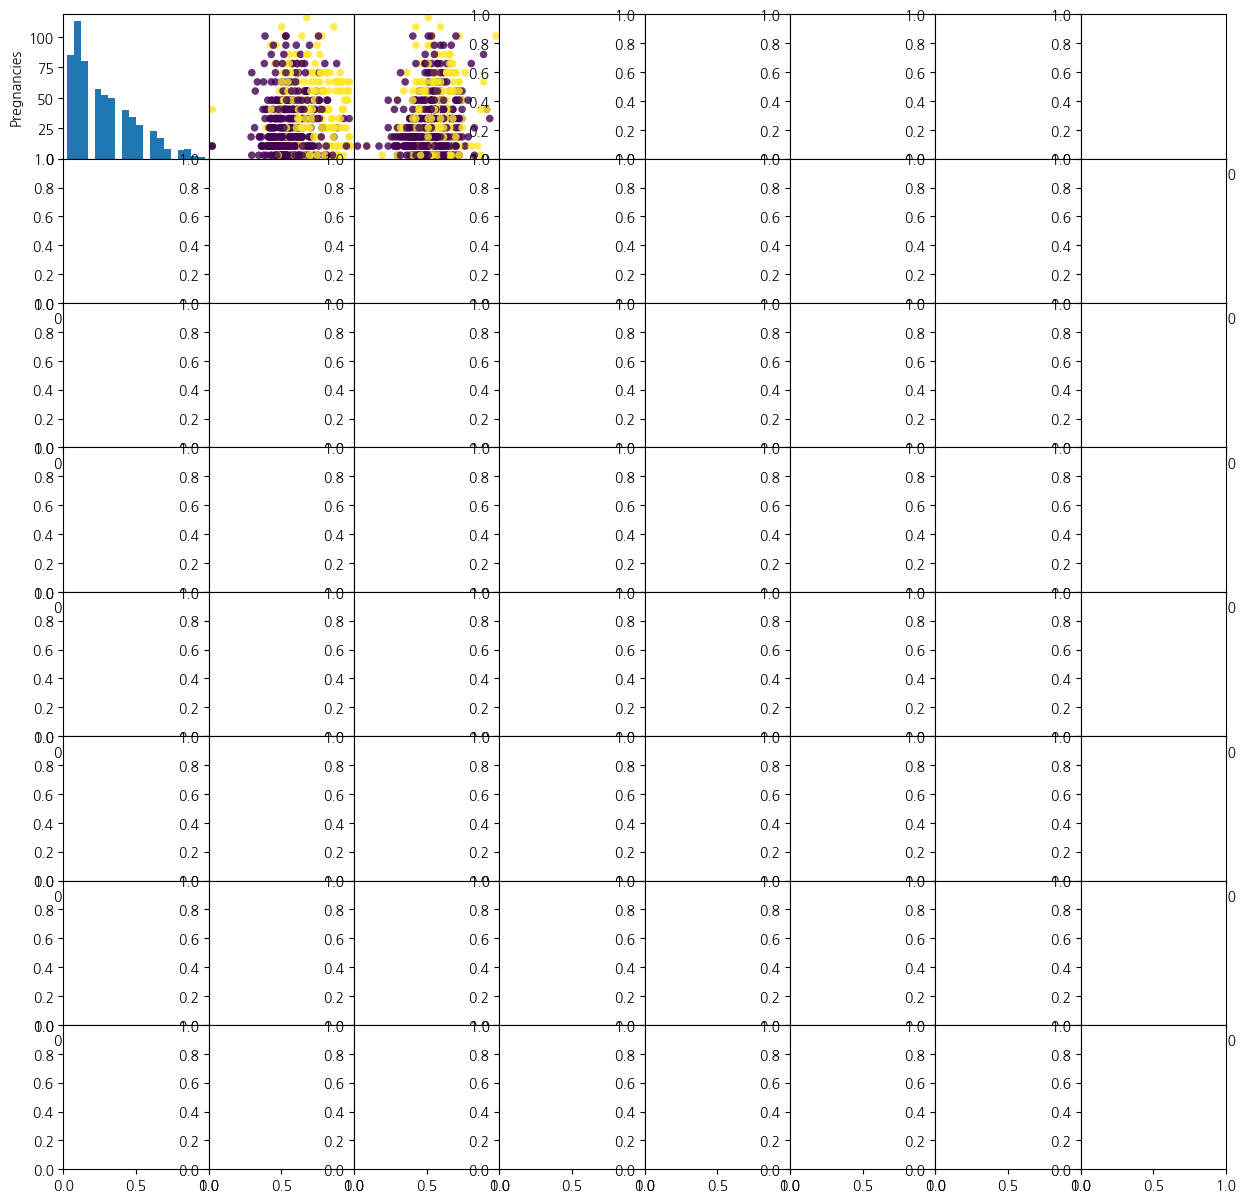

In [54]:
import pandas as pd
pd.plotting.scatter_matrix(X_train, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=30, alpha=.8)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [ ]:
X_new = np.array([[3, 133, 60, 15, 102, 30.2, 0.871, 30]])
X_new.shape

In [ ]:
prdct = knn.predict(X_new)
print("예측값: {}, ".format(prdct))

In [ ]:
y_pred = knn.predict(X_test)
y_pred

In [ ]:
np.mean(y_pred == y_test)

In [ ]:
df_data.mean()["BMI"]

In [ ]:
df1 = df_data["BMI"].replace(0, np.NaN)

In [ ]:
df_data.head(50)